In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
print(X_train.shape[0])

60000


In [5]:
print(X_test.shape[0])

10000


In [6]:
X_train.shape #이미지 3차원 데이터

(60000, 28, 28)

In [7]:
X_test.shape # 개수, width, height

(10000, 28, 28)

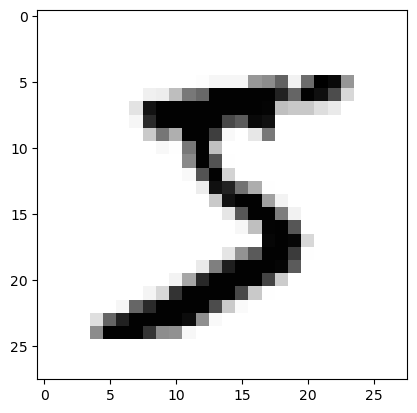

In [8]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [9]:
X_train[0].shape #첫장의 모양

(28, 28)

In [10]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i) #i = px (1byte=8bit 0~256)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [11]:
X_train=X_train.reshape(X_train.shape[0], 28*28) #Dense는 1차원으로 받아서 차원 변화
X_train=X_train.astype(float) / 255.

X_test=X_test.reshape(X_test.shape[0], 28*28).astype(float) / 255.

In [12]:
print(y_train[0])

5


In [13]:
y_train=to_categorical(y_train) #10개가 다 들어가 있지 않아서 ,10 안넣어도 됨
y_test=to_categorical(y_test)

In [15]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
#os.environ['KMP_LIB_DUPLICATE_OK'] = "TRUE"

In [18]:
model=models.Sequential()
model.add(layers.Dense(512, input_dim=28*28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정구간입니다.
MODEL_DIR = 'model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "model/MNIST_MLP.h5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [20]:
h = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping,checkpointer])


Epoch 1: val_loss improved from inf to 0.19432, saving model to model\MNIST_MLP.h5

Epoch 2: val_loss improved from 0.19432 to 0.13957, saving model to model\MNIST_MLP.h5

Epoch 3: val_loss improved from 0.13957 to 0.12025, saving model to model\MNIST_MLP.h5

Epoch 4: val_loss improved from 0.12025 to 0.10746, saving model to model\MNIST_MLP.h5

Epoch 5: val_loss improved from 0.10746 to 0.09141, saving model to model\MNIST_MLP.h5

Epoch 6: val_loss did not improve from 0.09141

Epoch 7: val_loss did not improve from 0.09141

Epoch 8: val_loss improved from 0.09141 to 0.08175, saving model to model\MNIST_MLP.h5

Epoch 9: val_loss did not improve from 0.08175

Epoch 10: val_loss did not improve from 0.08175

Epoch 11: val_loss did not improve from 0.08175

Epoch 12: val_loss did not improve from 0.08175

Epoch 13: val_loss did not improve from 0.08175

Epoch 14: val_loss did not improve from 0.08175

Epoch 15: val_loss did not improve from 0.08175

Epoch 16: val_loss did not improve fr

In [21]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1])) #작고 흑백 이미지, 단순한 구조라서 높은 정확도

313/313 [==============================] - 1s 1ms/step - loss: 0.0671 - accuracy: 0.9813

 Test Accuracy: 0.9813


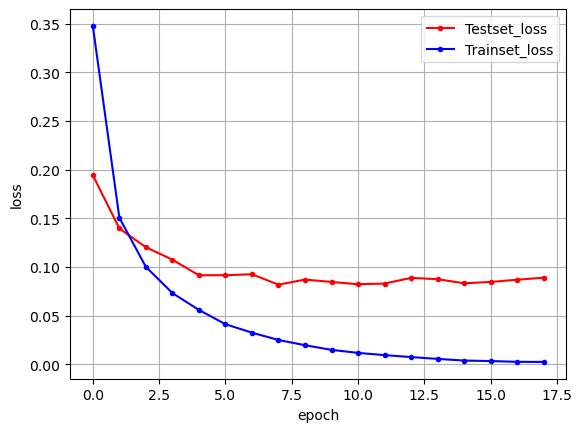

In [22]:
y_vloss = h.history['val_loss']
y_loss = h.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#Computer Vision
##영역 처리
Convolution
    -공간 영역 기반 처리
    -mask내의 원소값과 공간 영역에 있는 입력 영상의 화소값들을 대응되게 곱하여 출력화소값을 계산
    -이 과정을 모든 출력화소값에 대해 이동하면서 수행하는 방법
    -이 때 곱해지는 mask를 kernel,window또는 filter라고도 함
Stride: 한픽셀 옆으로 이동 -> 3* 3 convolution 계산하면 위 아래 좌우 1px씩 날아감
                           -> 5* 5 convolution 계산하면 위 아래 좌우 2px씩 날아감
용도: Blurring
    -영상을 밝게 수정하면서 약간 흐리게 처리하는 기법
    -영상에서 화소값이 급격하게 변하는 부분들을 감소시켜 점진적으로 변하게 함. 
    -전체적으로 부드러운 느낌이 나게 만듬
용도: Sharpening
    -출력화소에서 이웃간의 차이를 급격하게 많이 나게 처리하는 기법
용도: Edge 검출
    -Edge: 화소값이 급격하게 변하는 부분